# 1.Importattion de la librairie

In [170]:
import numpy as np
import pandas as pd

# 2. chargement des donnees



In [171]:
data = pd.read_csv('data/studentscores.csv')

In [172]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


# 3.ANALYSE DES DONNEES

In [173]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [174]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [175]:
data['Hours'].max()

np.float64(9.2)

In [176]:
data['Hours'].min()

np.float64(1.1)

In [177]:
print(data['Hours'].max())

9.2


In [178]:
print("Max Score: ",data['Scores'].max())

Max Score:  95


In [179]:
print("Min Score: ",data['Scores'].min())

Min Score:  17


# 4.Division des donnees

In [180]:
data.head(4)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75


# Variable indep et Variable Dep

In [181]:
x = data.iloc[:,: -1].values

In [182]:
y = data.iloc[ : ,-1].values

In [183]:
x

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [184]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86])

# 4.1 separation des donnes : Train et TEst

In [185]:
#x_train ,  x_test,  y_train, y_test 
from sklearn.model_selection import train_test_split

In [186]:
x_train ,  x_test,  y_train, y_test = train_test_split(x ,y, test_size=0.25, random_state=40)

In [187]:
print('x-train Shape', x_train.shape)
print('x-test Shape', x_test.shape)
print('y-train Shape', y_train.shape)
print('y-test Shape', y_test.shape)

x-train Shape (18, 1)
x-test Shape (7, 1)
y-train Shape (18,)
y-test Shape (7,)


# 5.Construire des modeles

In [188]:
from sklearn.linear_model import LinearRegression

In [189]:
modele_lineaire = LinearRegression()

In [190]:
# Entrenement du modele
modele_lineaire.fit(x_train, y_train)

LinearRegression()

In [191]:
# faire de prediction
y_scores_predits = modele_lineaire.predict(x_test)

In [192]:
y_scores_predits

array([90.34862057, 79.20125828, 11.303688  , 75.147672  , 33.59841257,
       86.29503428, 48.79936114])

In [193]:
y_test

array([95, 86, 17, 69, 42, 75, 54])

In [194]:
resultats = pd.DataFrame(y_test, y_scores_predits)

In [195]:
resultats

,0
90.348621,95
79.201258,86
11.303688,17
75.147672,69
33.598413,42
86.295034,75
48.799361,54


In [196]:
# Evaluation du modele
from sklearn.metrics import mean_squared_error, r2_score

In [197]:
print("MSE de la regrasssion lineaire:", mean_squared_error(y_test, y_scores_predits))

MSE de la regrasssion lineaire: 51.90159659147337


In [198]:
print("R2 Score de la regression lineaire :", r2_score(y_test, y_scores_predits))

R2 Score de la regression lineaire : 0.9168569951293908


# 6.Visualisation de Resultats

In [199]:
import matplotlib.pyplot as plt

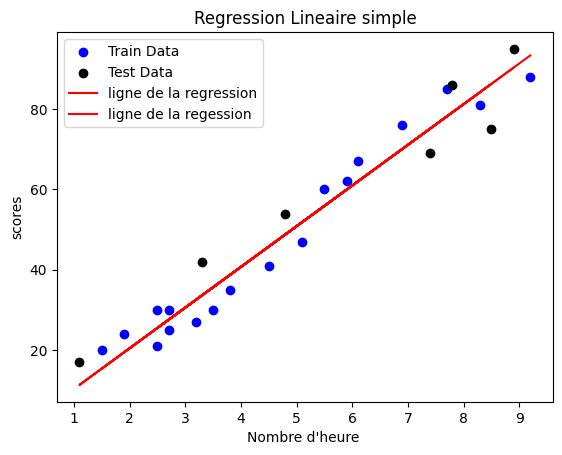

In [200]:
plt.scatter(x_train, y_train, color = 'blue', label = 'Train Data') 
plt.scatter(x_test, y_test, color = 'black', label = 'Test Data')
plt.plot(x_test, y_scores_predits, color ='red', label = 'ligne de la regression')
plt.plot(x_train, modele_lineaire.predict(x_train), color = 'red', label = 'ligne de la regession ')
plt.xlabel("Nombre d'heure ")
plt.ylabel("scores")
plt.title("Regression Lineaire simple")
plt.legend()
plt.show()

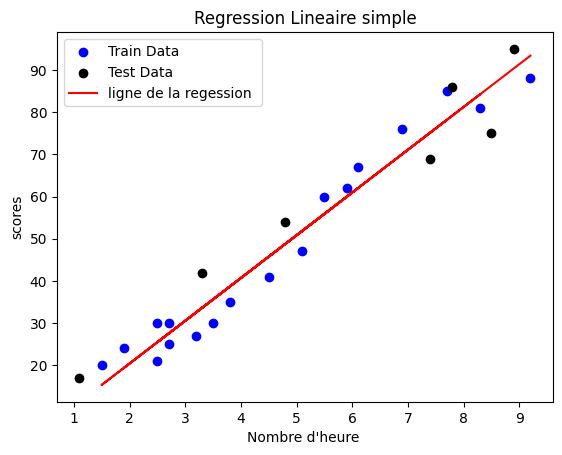

In [201]:
plt.scatter(x_train, y_train, color = 'blue', label = 'Train Data') 
plt.scatter(x_test, y_test, color = 'black', label = 'Test Data')
plt.plot(x_train, modele_lineaire.predict(x_train), color = 'red', label = 'ligne de la regession ')
plt.xlabel("Nombre d'heure ")
plt.ylabel("scores")
plt.title("Regression Lineaire simple")
plt.legend()
plt.show()

# 7.Prediction Simple

In [202]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [203]:
resultats = pd.DataFrame({'y-score-reel': y_test, 'y-score-predits':y_scores_predits})
resultats

,y-score-reel,y-score-predits
0,95,90.348621
1,86,79.201258
2,17,11.303688
3,69,75.147672
4,42,33.598413
5,75,86.295034
6,54,48.799361


In [204]:
y_scores_predits

array([90.34862057, 79.20125828, 11.303688  , 75.147672  , 33.59841257,
       86.29503428, 48.79936114])

In [205]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86])

In [206]:
print(modele_lineaire.predict([[10]]))

[101.49598285]


In [207]:
difference = y_test - y_scores_predits

In [208]:
resultat =pd.DataFrame({'y-scoe-reel': y_test, 'y-score-predits' :y_scores_predits, 'difference' : difference})
resultat


,y-scoe-reel,y-score-predits,difference
0,95,90.348621,4.651379
1,86,79.201258,6.798742
2,17,11.303688,5.696312
3,69,75.147672,-6.147672
4,42,33.598413,8.401587
5,75,86.295034,-11.295034
6,54,48.799361,5.200639


In [209]:
# Y= b0 + b1*X1
# Score = b0 + b1 * Hours
b1 =  modele_lineaire.coef_
print('b1 =', modele_lineaire.coef_)
b0 = modele_lineaire.intercept_
print('b0 =', modele_lineaire.intercept_)

b1 = [10.13396571]
b0 = 0.1563257200808863


In [210]:
score = b0 + b1*10

In [211]:
print(modele_lineaire.predict([[10]]))

[101.49598285]


In [212]:
print( score)

[101.49598285]
